In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot  as plt

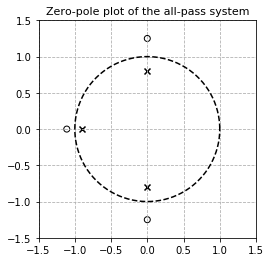

In [3]:
#poles
p1 = .9*np.exp(1j*np.pi)
p2 = .8*np.exp(1j*np.pi/2)
p3 = np.conj(p2)

#zeros
z1 = 1/np.conj(p1)
z2 = 1/np.conj(p2)
z3 = 1/np.conj(p3)

Z = np.array([z1,z2,z3])
P = np.array([p1,p2,p3])
theta = np.linspace(0, 2*np.pi, 100)

r = np.sqrt(1.0)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1)

ax.plot(x1, x2,'--k')
ax.scatter(np.real(Z), np.imag(Z), marker='o', edgecolor='k', facecolor='none')
ax.scatter(np.real(P), np.imag(P), marker='x', color='k')
ax.set_aspect(1)

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

plt.grid(linestyle='--')

plt.title('Zero-pole plot of the all-pass system', fontsize=11);

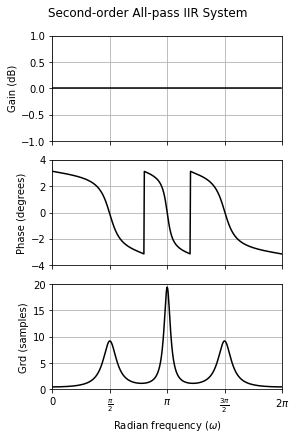

In [4]:
k = p1*p2*p3

b, a = signal.zpk2tf(Z,P,k)

w, H = signal.freqz(b,a,whole=True)

angleH = np.angle(H)
w, grdH = signal.group_delay((b,a),whole=True)

#Gain plot
fig2, axs = plt.subplots(3,1, sharex= True,figsize=(4,6),constrained_layout=True)
fig2.suptitle('Second-order All-pass IIR System')
axs[0].plot(w,20*np.log10(abs(H)),'k')
axs[0].set_ylabel('Gain (dB)')
axs[0].set_ylim([-1, 1])
axs[0].grid(True)

#Phase plot
axs[1].plot(w,angleH,'k')
axs[1].set_ylim([-4,4])
axs[1].grid()
axs[1].set_ylabel('Phase (degrees)')

#Group deleay plot
axs[2].plot(w,grdH,'k')
axs[2].set_ylabel('Grd (samples)')
axs[2].set_xlabel('Radian frequency '+ r'$(\omega)$')
axs[2].grid()
axs[2].set_ylim([0,20])
axs[2].set_xlim([0, 2*np.pi])
axs[2].set_xticks([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axs[2].set_xticklabels([0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']);
